# Clustering with Mall Customer Segmentation Data

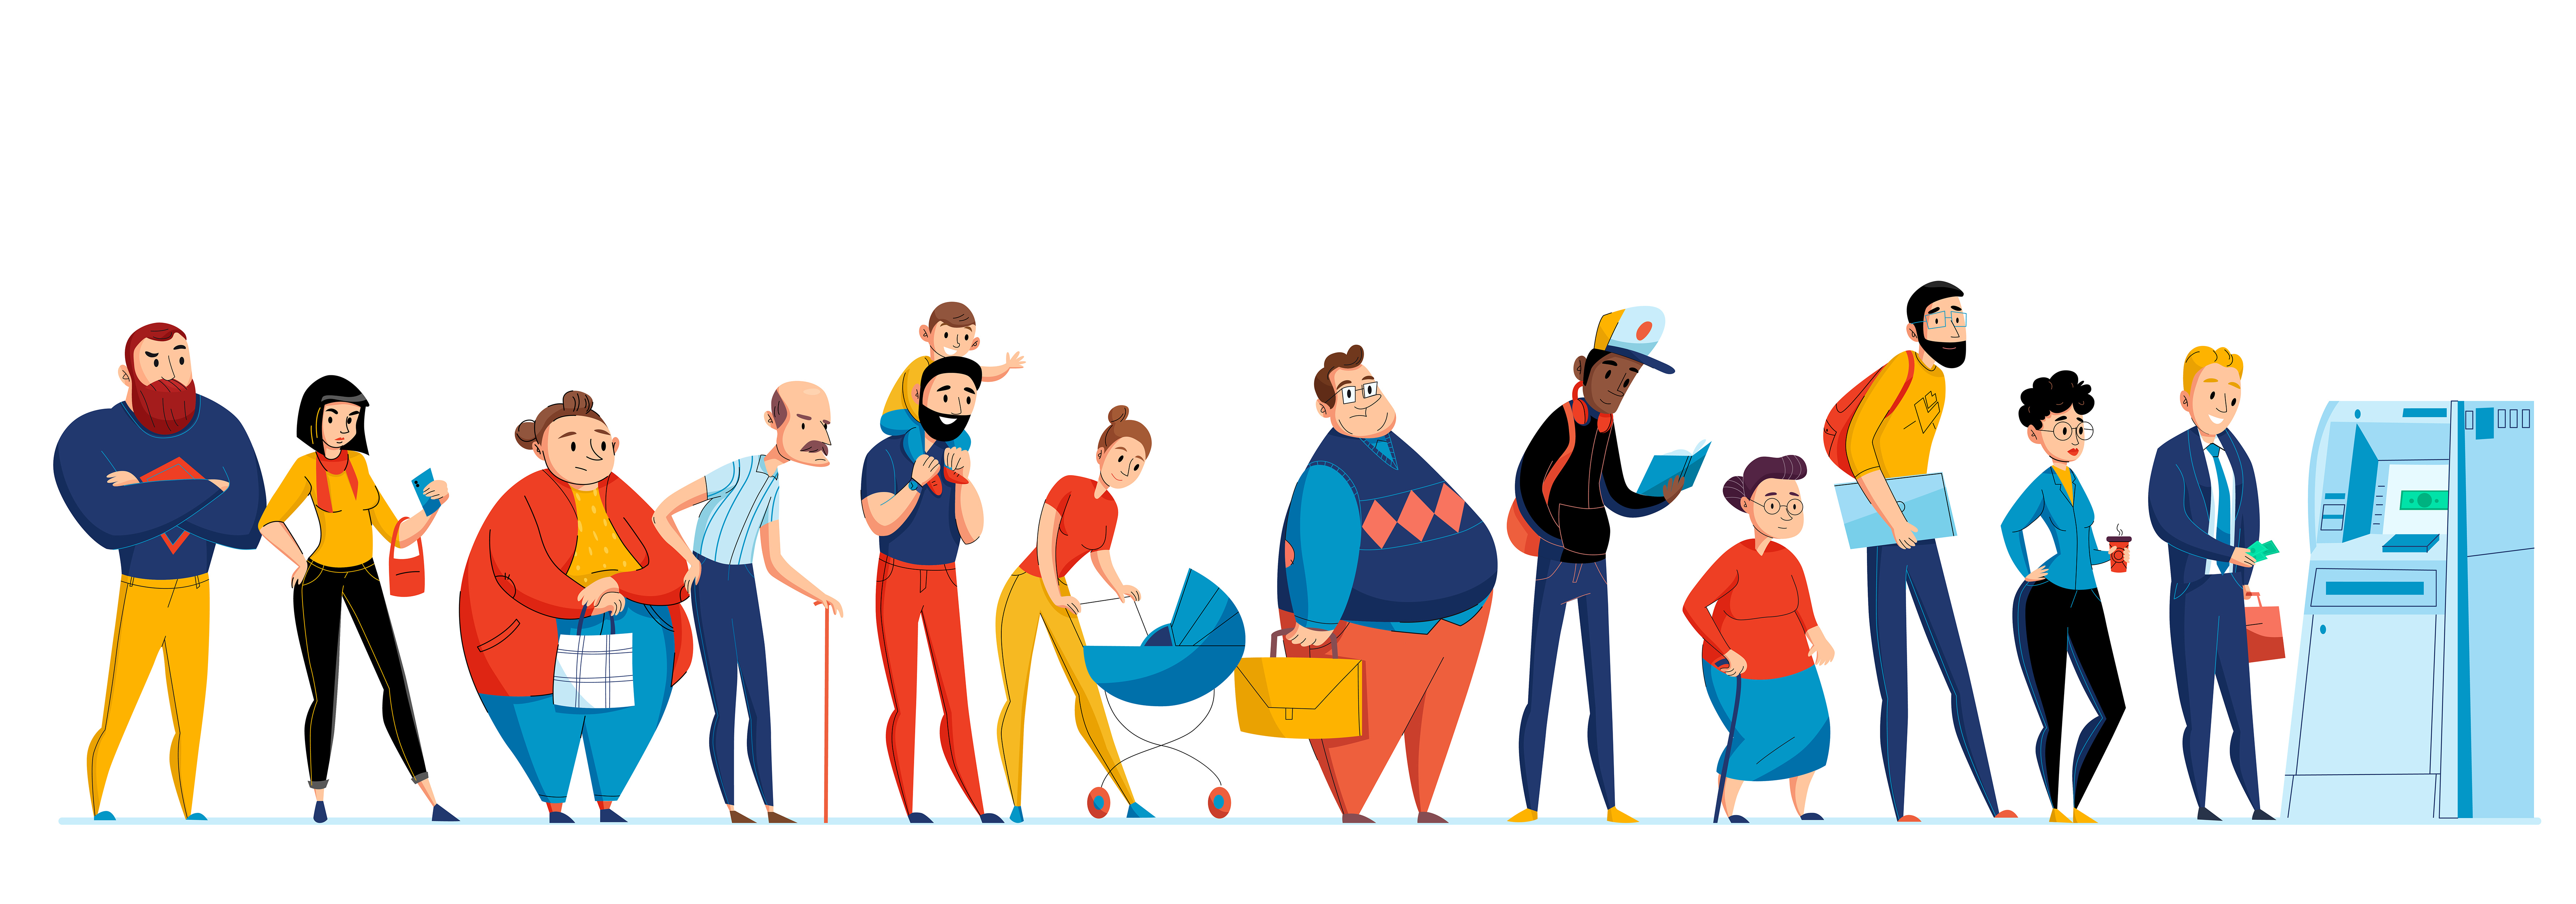

*this picture belongs to macrovector / Freepik*

In [329]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
%matplotlib inline
from sklearn.decomposition import PCA
import warnings # supress warnings
warnings.filterwarnings('ignore')

We use clustering to see in which clusters the different consumers are grouped and to better understand the profile of these consumers.

In [330]:
# importing Data
df = pd.read_csv('C:/Mall_Customers.csv')

In [331]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


As we can see, there are no null values ​​and the variables are numerical except gender.

- CustomerID: Unique ID assigned to the customer.
- Genre: Gender of the customer.
- Age: Age of the customer.
- Annual_Income: Annual Income of the customer.
- Spending_score: Score assigned by the mall based on customer behavior and spending nature.

In [333]:
df_clean = df.drop_duplicates()
if len(df_clean) == len(df):
    print("No duplicate elements")
else:
    print("Duplicate elements")

No duplicate elements


In [334]:
df.corr()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_Income_(k$),0.977548,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.327227,0.009903,1.000000


In [335]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Annual Income Distribution:

Text(0, 0.5, 'Count')

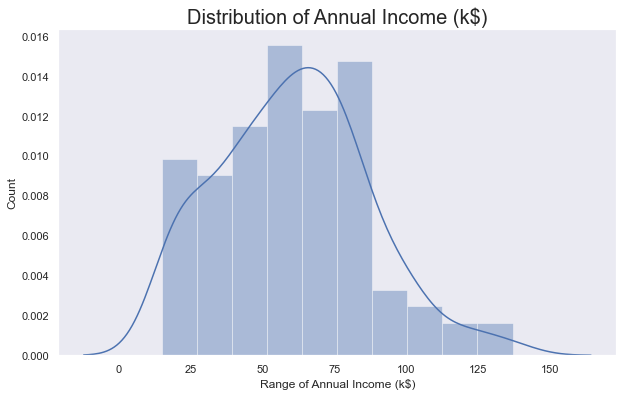

In [336]:
plt.figure(figsize=(10,6))
sns.set(style = 'dark')
sns.distplot(df['Annual_Income_(k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

The annual income is distributed especially between 45-80 thousand dollars.

#### Age Distribution:

Text(12.085, 0.5, 'Count')

<Figure size 720x432 with 0 Axes>

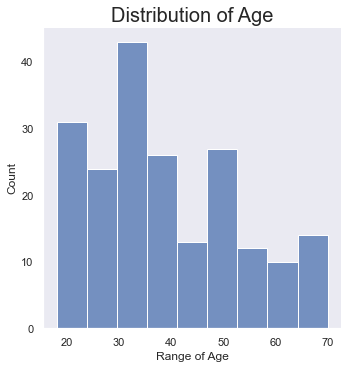

In [337]:
plt.figure(figsize = (10,6))
sns.set(style = 'dark' )
sns.displot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

As we can see, the people who come to buy are young people, people between 30 and 40 years old and people around 50 years old.


#### Score distribution:

Text(12.085, 0.5, 'Count')

<Figure size 720x432 with 0 Axes>

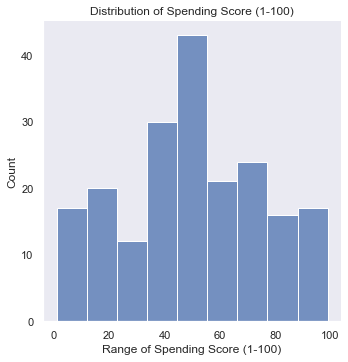

In [338]:
plt.figure(figsize = (10,6))
sns.set(style = 'dark')
sns.displot(df['Spending_Score'])
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

People between 40 and 60 spending scores stand out.

#### Gender Analysis:

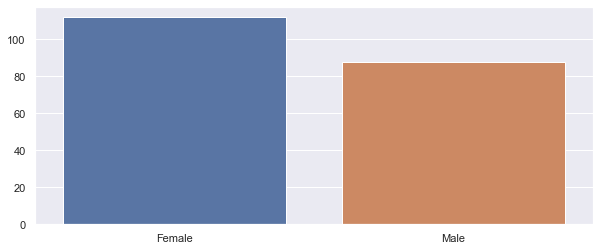

In [339]:
genders = df.Genre.value_counts()
sns.set_style('darkgrid')
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y = genders.values)
plt.show()

As we can see there are more women than men.

### 

In [340]:
# applying scale

df_scaled = df[['Age','Annual_Income_(k$)','Spending_Score']]

# scaler

scaler = StandardScaler()

df_scaled_fit = scaler.fit_transform(df_scaled)

df_scaled_fit = pd.DataFrame(df_scaled_fit)

df_scaled_fit.columns = ['Age','Annual_Income_(k$)','Spending_Score']

In [341]:
X = df_scaled_fit[['Annual_Income_(k$)','Spending_Score']]
X.head()

,Annual_Income_(k$),Spending_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


#### The input data

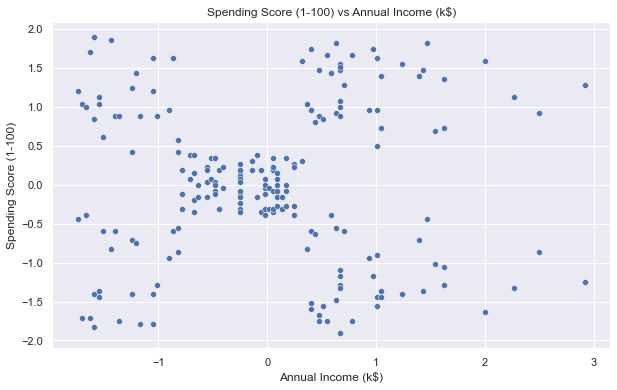

In [342]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual_Income_(k$)',y='Spending_Score', data = X)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

### Finding the optimal number of clusters

We will use two elements, Elbow graph and kneelocator.

#### Elbow Graph

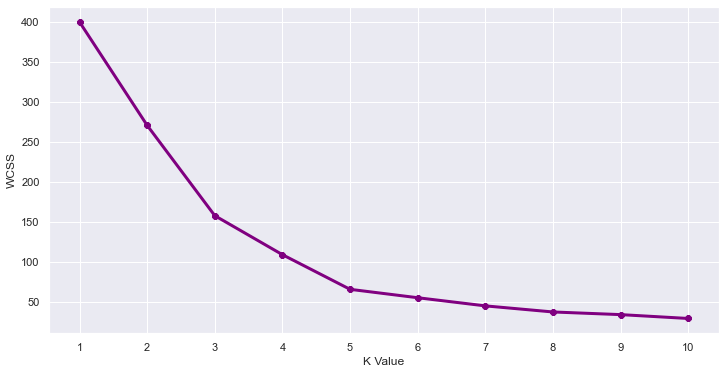

In [343]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(X)
    wcss.append(km.inertia_)
    
# Elbow graph

plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=3, color ='purple', marker='8')
plt.xlabel('K Value')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()

In [344]:
kl = KneeLocator(range(1,11), wcss, curve = 'convex', direction = 'decreasing')
kl.elbow

5

## Taking 5 clusters

In [345]:
km_1 = KMeans(n_clusters = 5)

# fitting the input data

km_1.fit(X)

# predicting the labels of the input

y = km_1.predict(X)

# adding the labels to a column named cluster

df['cluster'] = y

df.head()


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


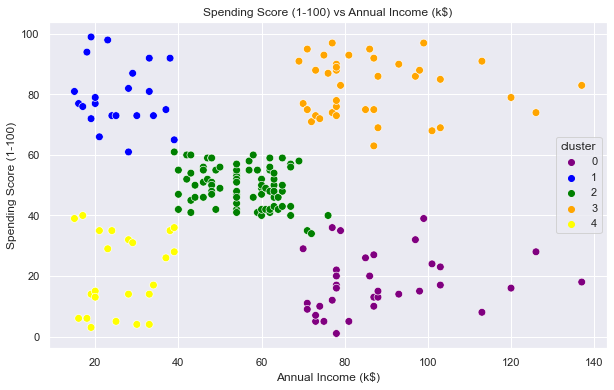

In [346]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= 'Annual_Income_(k$)',
                y= 'Spending_Score',
                hue = 'cluster',
                palette = ['purple','blue','green','orange','yellow'],
                legend = 'full',
                data = df,
                s = 60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

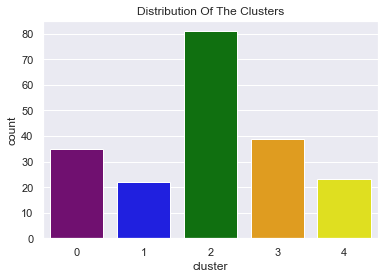

In [347]:
#Plotting countplot of clusters

pal = ["purple","blue", "green","orange",'yellow']
pl = sns.countplot(x=df["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [348]:
cust1=df[df["cluster"]==0]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df[df["cluster"]==1]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df[df["cluster"]==2]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df[df["cluster"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df[df["cluster"]==4]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 2nd group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 3rd group= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
--------------------------------------------
Number of customer in 4th group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 19

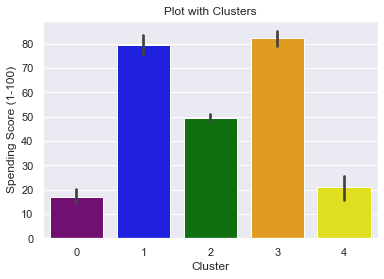

In [349]:
# distribution of spending score by cluster.
pl=sns.barplot(x=df["cluster"], y=df["Spending_Score"], palette=pal)
plt.title('Plot with Clusters')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.show()


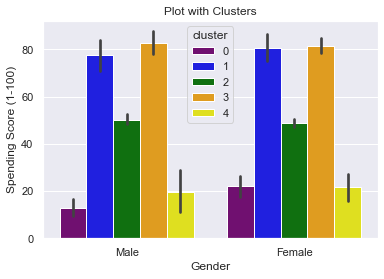

In [350]:
# distribution of spending score and gender by clusters
sns.barplot(data=df, x='Genre', y='Spending_Score', hue='cluster', palette= pal)
plt.title('Plot with Clusters')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

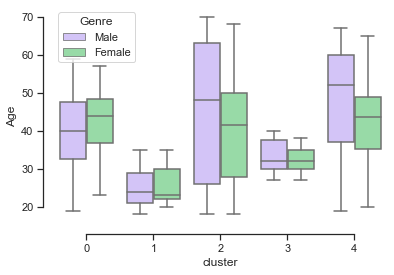

In [351]:
# distribution of age and gender by clusters
sns.set_theme(style='ticks', palette = 'pastel')

sns.boxplot(x='cluster', y = 'Age', hue = 'Genre', palette = ['m','g'], data = df)

sns.despine(offset=10, trim=True)

## Applying Silhouette Coefficient

In [352]:
# si faig el coeficient de silhouette
silhouette_coefficients = []
for k in range (2,20):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_)
    silhouette_coefficients.append(score)

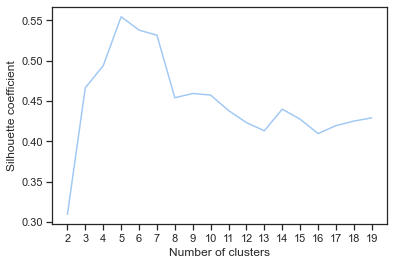

In [353]:
## plt.style.use("fivethirtyeight")
plt.plot(range(2,20), silhouette_coefficients)
plt.xticks(range(2,20))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

As we can see, the coefficient obtains its maximum with 5 clusters.

In [354]:
kmeans_silhouette = silhouette_score(df_norm, kmeans.labels_).round(2)
print('kmeans:', kmeans_silhouette)

kmeans: 0.43


We can see how the model does not explain a large percentage and would need to be improved.

## Conclusions:

| Cluster | Number of Customers | Age | Anual Income | Spending Score |
|---|---|---|---|---|
|0|16,20%|30-50|high|low|
|1|10,19%|20-30|low|high|
|2|37,50%|25-65|middle|middle|
|3|18,06%|30-40|high|high|
|4|18,06%|35-65|low|low|

We find 5 types of consumers. Where we can see that the groups with the highest spending score are young people between 20 and 30 years old who have a low annual income and people between 30 and 40 years old who have a high annual income. Both groups represent approximately 28% of total consumers.

In [355]:
# saving in excel.
df.to_excel('ClusteredMallCostumers.xlsx')